In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [312]:
from collections import namedtuple, deque

Point = namedtuple('Point', ['x', 'y'])

WHITE = np.array([255, 255, 255])
BLACK = np.array([0, 0, 0])
RED = np.array([255, 0, 0])
BLUE = np.array([0, 0, 255])
GREEN = np.array([0, 255, 0])
YELLOW = np.array([255, 255, 0])

def neighbours(p):
    yield Point(p.x - 1, p.y)
    yield Point(p.x, p.y + 1)
    yield Point(p.x + 1, p.y)
    yield Point(p.x, p.y - 1)
    

def in_bounds(im, p):
    return (0 <= p.x < len(im) and
            0 <= p.y < len(im[0]))


def dark(im, p, thresh=[50, 50, 50]):
    return np.less(im[p.x, p.y], [thresh]).all()


def free(im, p, fillcol):
    return (in_bounds(im, p) and
            not np.array_equal(im[p.x, p.y], fillcol) and
            not dark(im, p))


def fill(im, start, fillcol=[255, 0, 0]):
    if np.array_equal(im[start.x, start.y], BLACK):
        return
    
    max_buffer_size = 0
    points = deque([start])
    while len(points) > 0:
        current = points.popleft()
        if not free(im, current, fillcol):
            continue
            
        im[current.x, current.y] = fillcol
        for n in neighbours(current):
                points.append(n)
                max_buffer_size = max(len(points), max_buffer_size)
                
    print(max_buffer_size)

In [315]:
im = cv.imread('us.jpg')

In [316]:
centers = {
    'WA': Point(100, 250),
    'OR': Point(300, 250),
    'ID': Point(325, 425),
    'CA': Point(600, 150),
    'NV': Point(500, 275),
    'AZ': Point(800, 425),
    'UT': Point(575, 450),
    'MT': Point(200, 600),
    'WY': Point(400, 625),
    'CO': Point(575, 675),
    'NM': Point(800, 650),
    'ND': Point(200, 875),
    'SD': Point(325, 875),
    'NE': Point(475, 900),
    'KS': Point(625, 925),
    'OK': Point(775, 1000),
    'TX': Point(1000, 900),
    'MN': Point(250, 1050),
    'IA': Point(450, 1100),
    'MO': Point(600, 1125),
    'AR': Point(800, 1175),
    'LA': Point(975, 1150),
    'WI': Point(325, 1225),
    'IL': Point(525, 1250),
    'MS': Point(900, 1275),
    'IN': Point(525, 1375),
    'KY': Point(625, 1425),
    'TN': Point(725, 1400),
    'AL': Point(875, 1375),
    'MI': Point(350, 1375),
    'OH': Point(500, 1475),
    'GA': Point(875, 1525),
    'FL': Point(1050, 1625),
    'WV': Point(575, 1575),
    'NC': Point(700, 1650),
    'SC': Point(800, 1625),
    'NY': Point(325, 1725),
    'PA': Point(450, 1650),
    'VA': Point(600, 1675),
    'MD': Point(500, 1700),
    'VT': Point(250, 1800),
    'MA': Point(325, 1850),
    'CT': Point(365, 1825),
    'RI': Point(357, 1860),
    'NJ': Point(425, 1770),
    'DE': Point(520, 1760),
    'NH': Point(275, 1840),
    'ME': Point(150, 1900),
    'DC': Point(0, 0)
}

1002
646
1162
786
581
978
666
1108
1173
2345
1666
1306
1702
1686
1226
1050
1493
1109
1105
1485
261
245
818
78
3273
258
874
138
246
837
754
802
1073
1062
1158
1077
1194
1142
1473
1130
754
678
725
924
622
394
326
754
1113


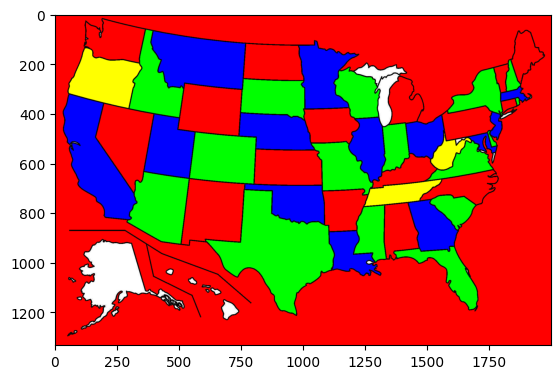

In [317]:
with open('us_colours_out.txt') as f:
    for line in f.read().splitlines():
        state, colour = line.split()
        if centers.get(state) is None:
            continue
            
        c = None    
        if colour == 'red':
            c = RED
        elif colour == 'green':
            c = GREEN
        elif colour == 'blue':
            c = BLUE
        elif colour == 'yellow':
            c = YELLOW
        else:
            print('unknown colour')
            break
        
        fill(im, centers[state], fillcol=c)
        
plt.imshow(im)
plt.show()